# CME 193 - Scientific Python
### Lecture 5 (4/21)
Spring 2016, Stanford University

## Last time...
* Some more advanced numpy
* Some plotting
* A cool SciPy example!

## Today...
* A programming paradigm!
* Description of Homework (plus some input from you)

# Quick Numpy

## Array Broadcasting

When operating on two arrays, numpy compares shapes. Two dimensions are compatible when:

* They are of equal size
* One of them is 1

What does this look like in a picture?

![bc](./nb-assets/img/broadcasting.png)

Quick example with Scipy!

In [1]:
from scipy.optimize import leastsq, fmin
from numpy import sin, cos, pi, sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define a simple signal model
def model(par):
    p = 2.0
    return par[0] + par[1]*sin(2*pi*t/p) + (t/5) ** 2 * par[2]*(cos(2*pi*t/(p*(t + 1))))**2

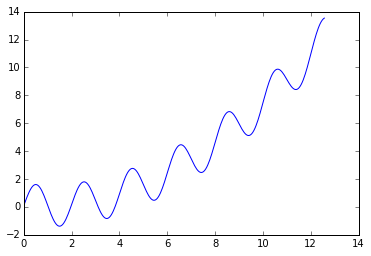

In [3]:
# Create some data with this model
par = [0.1, 1.5, 2]
t = np.linspace(0, 4 * pi, 300)
y = model(par)

plt.plot(t, y, label='data')

In [4]:
# Add a bit of gaussian noise
dy = 3*np.random.normal(0, 1, y.shape[0])
y += dy

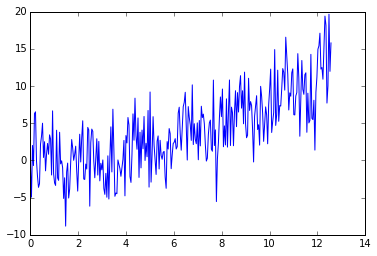

In [5]:
plt.plot(t, y, label='data')

In [6]:
# error function we minimize, simply the 1-norm
def resid(par):
    return np.sum(np.abs(model(par)-y))

In [7]:
x0 = np.array([0, 0, 0])
rez = fmin(resid, x0)

Optimization terminated successfully.
         Current function value: 771.340985
         Iterations: 204
         Function evaluations: 363


In [8]:
print 'Exact parameters: ', par
print 'Fitted parameters:', rez

Exact parameters:  [0.1, 1.5, 2]
Fitted parameters: [-0.07911866  1.47540444  2.1042333 ]


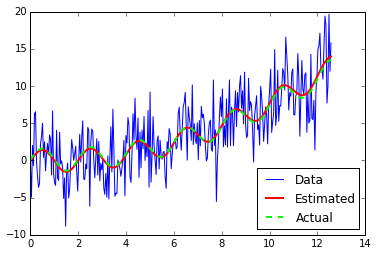

In [9]:
plt.plot(t, y, label='Data', color='blue')
plt.plot(t, model(rez), label='Estimated', color='red', linewidth=2)
plt.plot(t, model(par), '--', label='Actual', color='lime', linewidth=2)
plt.legend(loc=4)

## Classes

So far, we have seen many objects in the course that come standard with Python. 

* Integers
* Strings 
* Lists 
* Dictionaries
* Sets
* etc...

But often, one wants to build (much) more complicated structures! (why...)

As usual with programming, we want to *abstract* concepts away.

Suppose you have a program that needs to store all information about houses. How are we storing all information about this house?

A house might be a list with two elements, one for rooms, one for construction information.

```
house = [{bathroom: ..., kitchen: ...}, [brick, wood, ...]]
```

For the rooms we might again want to know about what’s in the room, what it’s made of.

So `bathroom = (materials, bathtub, sink)`, where materials might be a list.

Now lets say we care about *where* the materials are from. 

See what I'm getting at? 

We get a terribly nested structure, impossible to handle! Let’s think more about this...

## A Pythonic Solution -- Classes

We can use this example to introduce the notion of object oriented programming. 

We can construct our own objects:

* `House`
* `Room`
* `BuildingMaterial`
* etc

The House could have a set that holds the rooms, each room has a set of furniture, each piece of furniture has a set of materials, etc, etc.

Structure in familiar form *much* easier to understand and doesn't lead to programming errors.

```python
for room in house.rooms:
    print 'In room: {}'.format(room.name)
    for piece in room.furniture:
        print '   * item: {}, made with {}'.format(
            piece.name, ', '.join(m.name for m in piece.materials)
        )
```

We could have output:
```
In room: bedroom
   * item: bed, made with wood, fabric, springs
   * item: table, made with wood, screws
In room: kitchen
   * item: fridge, made with aluminum, ...
   ...
```

### Object Oriented Programming (OOP)

In OOP, we express computation in terms of objects, which are instances of classes 

* Class Blueprint (only one)
* Object Instance (many)

Classes specify attributes (data) and methods to interact with the attributes.

For those of you coming from languages such as C++ and Java, you've seen things like data protection with private and public attributes and methods. 

Python doesn't have this! 

People name things that "you shouldn't touch" with an underscore ("`_`") infront.

In [10]:
# -- minimal example...
# define class:
class Leaf(object): 
    pass
# instantiate object
leaf = Leaf()
print leaf
print type(leaf)
print isinstance(leaf, Leaf)

<class '__main__.Leaf'>
True


We can make our objects more complex and involved by specifying an initialization method. In practice, we define a class method called `__init__`.

In [11]:
# example
class Leaf(object):
    def __init__(self, color):
        self.color = color # private attribute 
    
redleaf = Leaf('red')
blueleaf = Leaf('blue')

print redleaf.color

red


The self parameter seems strange at first sight. It refers to the the object (instance) itself. 

If you come from C++, equivalent to `this`. Hence, `self.color = color` sets the `color` of the object `self.color` equal to the variable `color`.

Now, lets discuss *methods* -- these are similar to regular functions, but need **self** implicitly passed as a first argument.

In [12]:
class Stock(object):
    def __init__(self, name, symbol, prices=[]):
        self.name = name 
        self.symbol = symbol 
        self.prices = prices
        
    def high_price(self):
        if len(self.prices) == 0:
            return 'MISSING PRICES'
        return max(self.prices)
    

In [31]:
apple = Stock('Apple', 'APPL', [500.43, 570.60, 569.20]) 

In [32]:
print apple.high_price()

570.6


Python has both object and class attributes

In [14]:
class Leaf(object):
    n_leaves = 0 # class attribute: shared
    def __init__(self, color):
        self.color = color # object attribute 
        Leaf.n_leaves += 1

In [15]:
redleaf = Leaf('red')
blueleaf = Leaf('blue')

In [16]:
print redleaf.color # red
print Leaf.n_leaves #2

red
2


In [17]:
purpleleaf = Leaf('purple')
print Leaf.n_leaves #3

3


### Hierarchy

A natural thing to think about as it relates to classes is the notion of *hierarchy*. We imbue the notion of hierarchy through something called *inheritance*.

An example:

* Animal
  * Bird
    * Hawk 
    * Seagull
    * ...
  * Dog
    * Shiba Inu
    * Golden Retriever
    * ...
  * ...

In [18]:
# lets define an *abstract* base class.

class Animal(object):
    def __init__(self, n_legs, color):
        self.n_legs = n_legs 
        self.color = color
    def make_noise(self): 
        print 'noise'

In [ ]:
# lets define some classes that will inherit
class Dog(Animal):
    def __init__(self, color, name):
        Animal.__init__(self, 4, color)
        self.name = name 
    def make_noise(self):
        print self.name + ': ' + 'woof'
        

In [19]:
class Bird(Animal):
    def __init__(self, color, name, has_wings=True, can_fly=True):
        Animal.__init__(self, 2, color)
        self.name = name
        self.has_wings = has_wings
        self.can_fly = can_fly
    
    def make_noise(self):
        print self.name + ': chirp!'

In [20]:
# noise
brutus = Dog('black', 'Brutus')
brutus.make_noise()

Brutus: woof


In [21]:
shelly = Bird('white', 'Shelly')
shelly.make_noise()

Shelly: chirp!


There are some standard methods that one may want to overload / implement:

* `__init__`: Constructor
* `__repr__`: Represent the object (machine) 
* `__str__`: Represent the object (human) and gets called when you `print`

these `__method__` looking functions are built into Python! You'll learn more about these in the homework.

## Example

Your homework will be similar to this! Except we will make it more interesing...

Let's say we want to implement a class for rational numbers. Reminder, for $a \in \mathbb{Q}$, $a = \frac{p}{q}$ with $p,q \in \mathbb{Z}$ and $q\neq 0$. What is the minimal specification for this in a class?

* We need a numerator
* We need a denominator
* We need to be able to simplify...
* We need to check our conditions...

In [22]:
class Rational(object):
    def __init__(self, p, q=1):
        
        assert(q != 0)
        assert(isinstance(p, int))
        assert(isinstance(q, int))
        
        self.p = p
        self.q = q

This is great! But, something is missing -- we still need to simplify! We'll use the Euclidean Algorithm.

In [23]:
# Let's implement the Euclidean Alg.
def gcd(a, b): 
    if b == 0:
        return a 
    else:
        return gcd(b, a % b)

In [24]:
print gcd(35, 49)

7


In [25]:
# lets add this to our function! Lets also add a __str__ and __float__ method
class Rational(object):
    def __init__(self, p, q=1):
    
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise ValueError('Numerator must be an integer')
        if not isinstance(q, int):
            raise ValueError('Denominator must be an integer')
        
        g = gcd(p, q)
        
        self.p = p / g
        self.q = q / g
    
    def __float__(self):
        return float(self.p) / float(self.q)    
    
    def __str__(self):
        return '{} / {}'.format(self.p, self.q)

In [26]:
# Lets see if these behave as we expect...
a = Rational(6, 4)
b = Rational(3, 2)

print 'a = {}'.format(a)
print 'b = {}'.format(b)

a = 3 / 2
b = 3 / 2


Lets also add the ability to add two Rational numbers...

In [27]:
class Rational(object):
    def __init__(self, p, q=1):
    
        if q == 0:
            raise ValueError('Denominator must not be zero')
        if not isinstance(p, int):
            raise ValueError('Numerator must be an integer')
        if not isinstance(q, int):
            raise ValueError('Denominator must be an integer')
        
        g = gcd(p, q)
        
        self.p = p / g
        self.q = q / g
        
    def __float__(self):
        return float(self.p) / float(self.q)
    
    def __str__(self):
        '''
        Convert `self` to a string representation.
        '''
        return '{} / {}'.format(self.p, self.q)
    
    def __add__(self, other):
        '''
        this is R + X, where R is rational and X is another number
        '''
        if isinstance(other, Rational):
            return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
        # -- if its an integer...
        elif isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)
    
    def __radd__(self, other):
        '''
        this is X + R, where R is rational and X is not rational
        '''
        # -- if its an integer...
        if isinstance(other, int):
            return Rational(self.p + other * self.q, self.q)
        # -- otherwise, we assume it will be a float
        return float(self) + float(other)


```python
def __add__(self, other):
    '''
    this is R + X, where R is rational and X is another number
    '''
    if isinstance(other, Rational):
        return Rational(self.p * other.q + other.p * self.q, self.q * other.q)
    # -- if its an integer...
    elif isinstance(other, int):
        return Rational(self.p + other * self.q, self.q)
    # -- otherwise, we assume it will be a float
    return float(self) + float(other)
```

```python
def __radd__(self, other):
    '''
    this is X + R, where R is rational and X is not rational
    '''
    # -- if its an integer...
    if isinstance(other, int):
        return Rational(self.p + other * self.q, self.q)
    # -- otherwise, we assume it will be a float
    return float(self) + float(other)
```

In [28]:
R = Rational(3, 4)
print R

3 / 4


In [29]:
print 'Integer adding:'
print 'right add'
print R + 4
print float(R + 4)
print 'left add'
print 4 + R
print float(4 + R)

Integer adding:
right add
19 / 4
4.75
left add
19 / 4
4.75


In [30]:
print 'Float adding:'
print 'right add'
print R + 4.2
print float(R + 4.2)
print 'left add'
print 4.2 + R
print float(4.2 + R)

Float adding:
right add
4.95
4.95
left add
4.95
4.95


## Homework #1

Will be posted 5pm today, due 5pm next Thursday. 

You will be creating a Matrix class from scratch! Learn about what needs to go into Numpy...

Low level, get you thinking about scientific computing!

## Homework #2

...